In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [7]:
data_import = pd.read_csv("clothing_size.csv")
data_import

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


# Basic EDA

In [9]:
data_import.shape

(119734, 4)

In [8]:
data_import["size"].value_counts()

size
M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: count, dtype: int64

# Data preparation

## Dealing with NA

In [11]:
data_import.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

Removing the na rows from the data

In [13]:
data_step_one = data_import.copy()
data_step_one = data_step_one.dropna(axis = 0)
dropped_rows = len(data_import) - len(data_step_one)
print("Dropped rows: ",dropped_rows)

Dropped rows:  581


We will also drop XXL since we don't have a representational amount of this data

In [14]:
data_step_one = data_step_one[data_step_one["size"] != "XXL"]
data_step_one

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


# Train Test Split

In [16]:
X = data_step_one[["weight","age","height"]]
y = data_step_one["size"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

In [18]:
X_train

,weight,age,height
73948,53,33.0,167.64
43450,58,33.0,165.10
109710,59,34.0,172.72
102646,53,25.0,154.94
93233,48,25.0,167.64
...,...,...,...
52188,52,32.0,162.56
6961,57,35.0,165.10
95626,54,30.0,160.02
5972,59,42.0,162.56


In [19]:
X_test

,weight,age,height
69352,68,43.0,157.48
69230,61,48.0,170.18
27500,67,32.0,160.02
114669,72,33.0,162.56
39959,57,34.0,157.48
...,...,...,...
110780,70,33.0,162.56
73190,52,29.0,165.10
23038,63,37.0,165.10
2800,56,32.0,160.02


In [20]:
y_train

73948       M
43450       M
109710      S
102646    XXS
93233       S
         ... 
52188       S
6961        M
95626       S
5972        M
2064        M
Name: size, Length: 79786, dtype: object

In [21]:
y_test

69352     XXXL
69230        M
27500       XL
114669    XXXL
39959        M
          ... 
110780    XXXL
73190      XXS
23038       XL
2800         M
42865       XL
Name: size, Length: 39298, dtype: object

# Modeling

## Single run

In [22]:
def decision_tree_run(depth):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    return tree_clf.score(X_test, y_test)
decision_tree_run(None)

0.5008397373912158

## Multiple Runs with Different Tree Depths

In [33]:
accuracy = []
tree_depth = list(range(2,100,3))

In [34]:
for i in tree_depth:
    accuracy.append(decision_tree_run(i))
accuracy

[0.44646037966308716,
 0.504020560842791,
 0.5156242047941371,
 0.5119853427655351,
 0.5078629955722938,
 0.5032062700391877,
 0.5012977759682427,
 0.5011450964425671,
 0.5008651839788284,
 0.5010942032673419,
 0.5008397373912158,
 0.5009924169168914,
 0.5009160771540536,
 0.5010178635045041,
 0.5010687566797293,
 0.5009924169168914,
 0.5008397373912158,
 0.5010687566797293,
 0.5010942032673419,
 0.5010942032673419,
 0.5009669703292788,
 0.500890630566441,
 0.5010687566797293,
 0.5010433100921167,
 0.5009669703292788,
 0.5010687566797293,
 0.5009415237416662,
 0.5011196498549545,
 0.5010178635045041,
 0.5008651839788284,
 0.5010178635045041,
 0.5010687566797293,
 0.5011196498549545]

In [35]:
max(accuracy)

0.5156242047941371

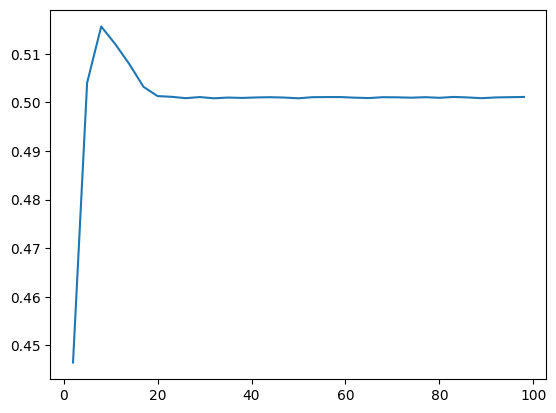

In [36]:
plt.plot(tree_depth, accuracy)

# Evaluation

In [39]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
export_graphviz(
    tree_clf,
    out_file="tree1.dot",
    feature_names = X_train.columns,
    rounded = True,
    filled = True
)

In [40]:
confusion_matrix(y_test, tree_clf.predict(X_test).tolist(),labels=y_test.unique())

array([[5435,  188, 1066,  344,   13,   17],
       [ 125, 6065,  640, 1190,  219, 1670],
       [1486, 1140, 2210, 1330,   11,  101],
       [ 349, 2281, 1357, 1533,   21,  193],
       [   9,  351,    3,    9, 1523, 1363],
       [  23, 2678,   53,  162, 1099, 3041]])